In [1]:
# Cross Validation

# Repeat steps from previous notebook.
import ssl
import tensorflow
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) 
# Transform 28 * 28 pixel images into 784 pixel array
num_pixels = X_train.shape[1]*X_train.shape[2]
X_train1D = X_train.reshape(X_train.shape[0],num_pixels)
X_test1D = X_test.reshape(X_test.shape[0],num_pixels)
y_test_boolean_array = (y_test == 5)
y_train_boolean_array = (y_train == 5)
sgd_clf.fit(X_train1D,y_train_boolean_array)

SGDClassifier(random_state=42)

In [2]:
# This will take a while! Get 3 accuracy measures (train on random 2/3, test on 1/3).
from sklearn.model_selection import cross_val_score
sgd_s=cross_val_score(sgd_clf, X_train1D, y_train_boolean_array, cv=3, scoring="accuracy")
sgd_s   # over 95% accuracy on all 3 cross validations
# Book points out that always saying "not 5" would give 90% accuracy.

array([0.95035, 0.96035, 0.9604 ])

In [3]:
# Get all the predictions (i.e. train on 2/3, predict on 1/3)
# Note sklearn has these other functions: precision_score(), recall_score(),f1_score()
from sklearn.model_selection import cross_val_predict
sgd_pred=cross_val_predict(sgd_clf, X_train1D, y_train_boolean_array, cv=3)
from sklearn.metrics import confusion_matrix
sgd_cm=confusion_matrix(y_train_boolean_array,sgd_pred)
sgd_cm    # not-5[ TN , FP ] , yes-5[ FN , TP ]

array([[53892,   687],
       [ 1891,  3530]])

In [4]:
# ROC curve.
# Have the predictor return thresholds, not scores.
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
sgd_y_scores = cross_val_predict(sgd_clf, X_train1D, y_train_boolean_array, cv=3, method="decision_function")
sgd_fpr, sgd_tpr, sgd_thresholds = roc_curve(y_train_boolean_array,sgd_y_scores)

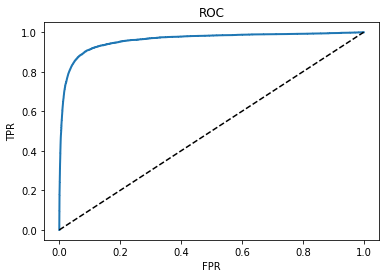

In [5]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(sgd_fpr,sgd_tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.title("ROC")
    plt.ylabel("TPR")
    plt.xlabel("FPR")
plot_roc_curve(sgd_fpr,sgd_tpr)
plt.show()

In [6]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_boolean_array,sgd_y_scores)

0.9604938554008616

In [11]:
# Try Random Forest on same data.
# Other is RF which does not have a thresholds function. Use predict_proba() instead.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rf_y_probs = cross_val_predict(rfc,X_train1D, y_train_boolean_array, cv=3, method="predict_proba")
rf_y_scores = rf_y_probs[:,1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_train_boolean_array,rf_y_scores)
rf_fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.83220653e-05, 5.49661958e-05, 5.49661958e-05, 5.49661958e-05,
       5.49661958e-05, 5.49661958e-05, 9.16103263e-05, 9.16103263e-05,
       1.09932392e-04, 1.09932392e-04, 1.09932392e-04, 1.09932392e-04,
       1.28254457e-04, 1.28254457e-04, 1.64898587e-04, 2.19864783e-04,
       2.19864783e-04, 2.56508914e-04, 2.56508914e-04, 2.74830979e-04,
       2.93153044e-04, 2.93153044e-04, 3.48119240e-04, 3.84763371e-04,
       4.21407501e-04, 4.39729566e-04, 4.58051632e-04, 5.13017827e-04,
       5.49661958e-04, 6.22950219e-04, 6.96238480e-04, 6.96238480e-04,
       7.51204676e-04, 8.24492937e-04, 8.97781198e-04, 1.08100185e-03,
       1.13596805e-03, 1.28254457e-03, 1.42912109e-03, 1.52073142e-03,
      

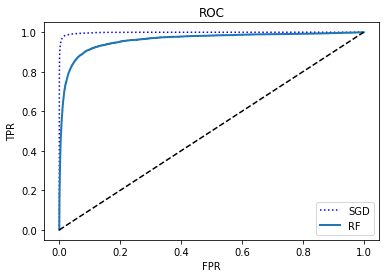

In [12]:
# ROC for two classifiers
plt.plot(rf_fpr,rf_tpr,"b:",label="SGD")
plot_roc_curve(rf_fpr, rf_tpr, "RF")
plt.legend(loc="lower right")
plt.show()

In [13]:
# Random Forest was much better than SGD (with defaults).
roc_auc_score(y_train_boolean_array,rf_y_scores)

0.9983436731328145